In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

In [2]:
df = pd.read_csv('AreaData.csv')

In [3]:
df

,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,arrest_year,area_name
0,2017-10-29,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,988972.0,207813.0,40.737082,-73.982962,2017,"221, East 21st Street, Gramercy, Manhattan Com..."
1,2010-09-24,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,1013888.0,253284.0,40.861839,-73.892853,2010,"2514, Marion Avenue, Fordham, Bronx County, Th..."
2,2015-07-29,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,998007.0,179260.0,40.658702,-73.950418,2015,"1177, Nostrand Avenue, Brooklyn Community Dist..."
3,2007-05-09,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,1032140.0,242004.0,40.830799,-73.826949,2007,"2899, Barkley Avenue, Schuylerville, Bronx Cou..."
4,2017-08-11,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,950012.0,162645.0,40.613041,-74.123318,2017,"1800, Victory Boulevard, Castleton Corners, St..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,2015-11-14,109.0,"ASSAULT 2,1,UNCLASSIFIED",PL 1200501,F,K,83,0.0,25-44,F,WHITE HISPANIC,1006376.0,192043.0,40.693771,-73.920213,2015,"119, Grove Street, Brooklyn, Kings County, Cit..."
5462,2018-07-03,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553001,F,K,84,0.0,25-44,M,BLACK,989003.0,192413.0,40.694813,-73.982861,2018,"176, Johnson Street, Brooklyn Navy Yard, Brook..."
5463,2015-05-05,478.0,"THEFT OF SERVICES, UNCLASSIFIED",PL 1651503,M,Q,112,0.0,18-24,M,BLACK,1031029.0,199612.0,40.714450,-73.831259,2015,"Kew Gardens-Union Turnpike (E,F), 80th Road, K..."
5464,2006-06-23,905.0,"INTOXICATED DRIVING,ALCOHOL",VTL11920M2,M,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,985110.0,215630.0,40.758539,-73.996897,2006,"West 40th Street, Hell's Kitchen, Manhattan, N..."


In [4]:
df['pin_code'] = df['area_name'].str.extract(r'(\b\d{5}\b)')

In [5]:
df['pin_code'] = pd.to_numeric(df['pin_code'], errors='coerce')

In [6]:
df.head()

,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,arrest_year,area_name,pin_code
0,2017-10-29,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,988972.0,207813.0,40.737082,-73.982962,2017,"221, East 21st Street, Gramercy, Manhattan Com...",10010.0
1,2010-09-24,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,1013888.0,253284.0,40.861839,-73.892853,2010,"2514, Marion Avenue, Fordham, Bronx County, Th...",10458.0
2,2015-07-29,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,998007.0,179260.0,40.658702,-73.950418,2015,"1177, Nostrand Avenue, Brooklyn Community Dist...",11225.0
3,2007-05-09,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,1032140.0,242004.0,40.830799,-73.826949,2007,"2899, Barkley Avenue, Schuylerville, Bronx Cou...",10465.0
4,2017-08-11,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,950012.0,162645.0,40.613041,-74.123318,2017,"1800, Victory Boulevard, Castleton Corners, St...",10314.0


In [7]:
df2 = df.drop(columns = ['arrest_date','area_name','x_coord_cd','y_coord_cd','latitude','longitude'])

In [8]:
df2['pd_desc'] = df2['pd_desc'].str.split().str.get(0)

In [9]:
df2['law_code'] = df2['law_code'].str[:3]

In [10]:
desc_value_counts = df2['pin_code'].value_counts()
values_to_remove = desc_value_counts[desc_value_counts < 20].index
df2 = df2[~df2['pin_code'].isin(values_to_remove)]

In [11]:
col = ['pd_desc','law_code', 'pd_cd','jurisdiction_code']
for i in col:
    desc_value_counts = df2[i].value_counts()
    values_to_remove = desc_value_counts[desc_value_counts < 5].index
    df2 = df2[~df2[i].isin(values_to_remove)]

In [12]:
df2

,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,arrest_year,pin_code
0,139.0,"MURDER,UNCLASSIFIED",PL,F,M,13,0.0,25-44,M,BLACK,2017,10010.0
1,809.0,TAX,TAX,M,B,52,0.0,45-64,M,BLACK,2010,10458.0
2,760.0,"BRIBERY,PUBLIC",PL,F,K,71,0.0,18-24,M,BLACK,2015,11225.0
3,439.0,"LARCENY,GRAND",PL,F,B,45,0.0,25-44,M,BLACK HISPANIC,2007,10465.0
4,101.0,ASSAULT,PL,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,2017,10314.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5459,101.0,ASSAULT,PL,M,B,46,0.0,45-64,F,BLACK HISPANIC,2008,10457.0
5461,109.0,ASSAULT,PL,F,K,83,0.0,25-44,F,WHITE HISPANIC,2015,11221.0
5462,439.0,"LARCENY,GRAND",PL,F,K,84,0.0,25-44,M,BLACK,2018,11201.0
5464,905.0,INTOXICATED,VTL,M,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,2006,10018.0


In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in df2.columns:
    df2[i] = label.fit_transform(df2[i])

In [14]:
y = df2[['jurisdiction_code']]
x = df2.drop(columns = ['jurisdiction_code'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
cla = Sequential()

In [18]:
cla.add(Dense(units=8, activation='relu'))
cla.add(Dense(units=1,activation='sigmoid'))

In [19]:
cla.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
cla.fit(X_train, y_train, epochs=150, batch_size=25)

Epoch 1/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.7194 - loss: 3.1652
Epoch 2/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.5053 - loss: 1.5503
Epoch 3/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.6096 - loss: 0.9972
Epoch 4/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.6454 - loss: 0.8450
Epoch 5/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.6801 - loss: 0.8042
Epoch 6/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.6871 - loss: 0.6949
Epoch 7/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.6780 - loss: 0.6761
Epoch 8/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.6861 - loss: 0.6462
Epoch 9/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7309 - loss: 0.6281
Epoch 10/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.6856 - loss: 0.6599
Epoch 11/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7254 - loss: 0.6178
Epoch 12/150
136/13

In [21]:
y_pred = cla.predict(X_test)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step


In [22]:
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

0.7909654561558902

In [26]:
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7776709207532946
Recall: 0.7909654561558902
F1 Score: 0.7823046340061187


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


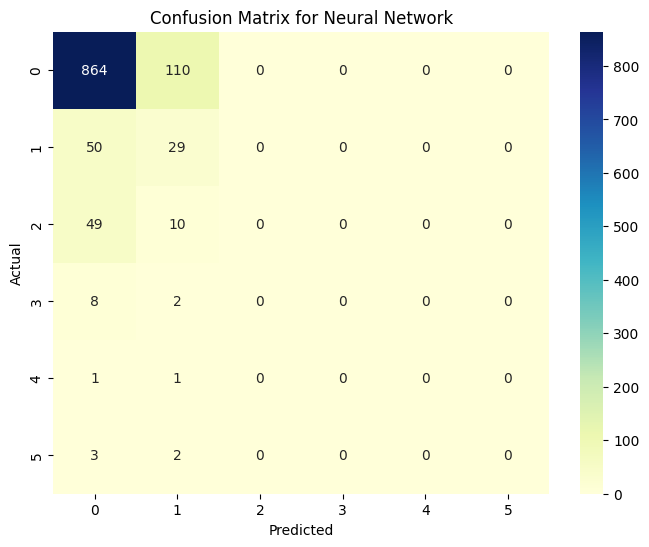

In [25]:
cdt = confusion_matrix(y_test.values, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cdt, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()